<img src='Capture-5.JPG'>

## Task # 5 : To Explore Business Analytics

You are the business owner of retail firm and want to see how your company is performing.  You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data ? 

### Loading the necessary libraries

In [82]:
#import the warnings.

import warnings
warnings.filterwarnings('ignore')

#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_info_columns',122)

### Reading the data

In [2]:
store_df=pd.read_csv("SampleSuperstore.csv")
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory Data Analysis

### Shape of data

In [3]:
store_df.shape

(9994, 13)

In [4]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Datatypes of variables

In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Describing Data

In [6]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for Duplicates

In [7]:
duplicates=store_df.duplicated()
sum(duplicates)

17

### Dropping the duplicate records

In [8]:
store_df=store_df.drop_duplicates()

### Checking for  Missing Values

In [9]:
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**No missing values present.**

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


## Univariate and Bivariate Analysis

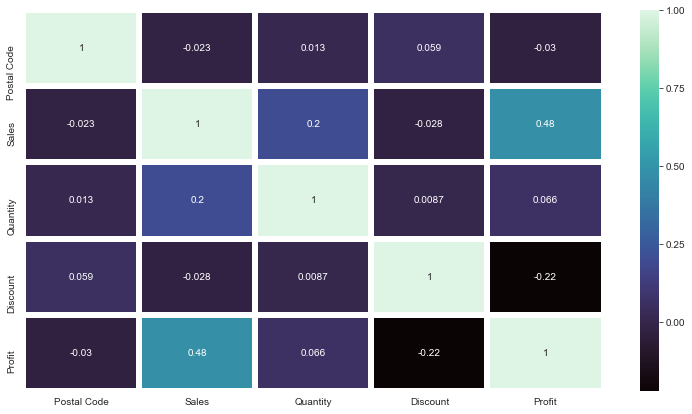

In [244]:
plt.rcParams['figure.figsize'] = [13, 7]
sns.heatmap(store_df.corr(),annot=True,cmap='mako',linecolor='white',lw=5)

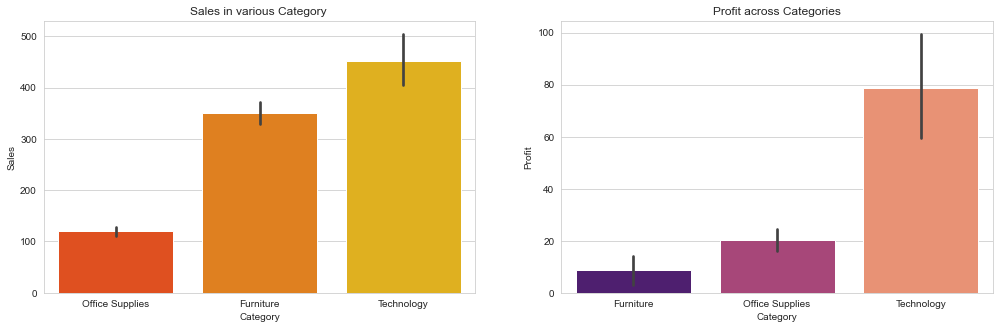

In [229]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,5))

ax0=sns.barplot(x="Category",data=store_df,y='Sales',order=store_df['Category'].value_counts().index,ax=axes[0],palette='autumn')
ax0.title.set_text('Sales in various Category')

ax1=sns.barplot(x="Category",data=store_df,y='Profit',ax=axes[1],palette='magma')
ax1.title.set_text('Profit across Categories')

#### Inference : 
* The categories 'Office supplies' have the least Sales.
* The categories 'Furniture' have least profit .
* The category 'technology' has the highest Sales and Profit.

Text(0.5, 1.0, 'Sales VS Profit')

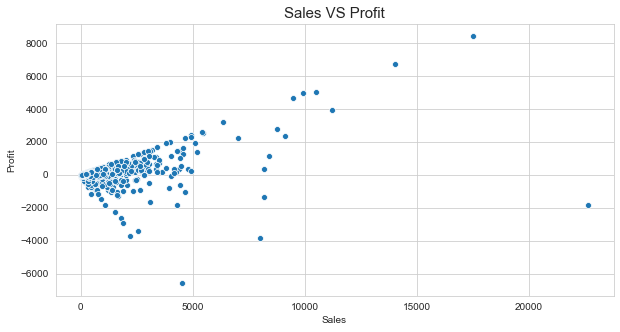

In [230]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.scatterplot(x='Sales',y='Profit',data=store_df)
plt.title('Sales VS Profit',fontsize=15)

#### Inference :  As the Sales increases the profit is also increasing.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

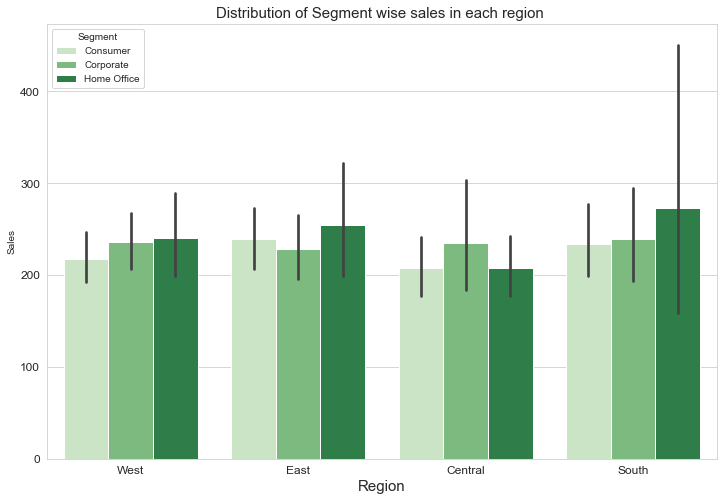

In [234]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title("Distribution of Segment wise sales in each region " , fontsize=15)
sns.barplot(x="Region",y='Sales',data=store_df,hue='Segment',order=store_df['Region'].value_counts().index,palette='Greens')
plt.xlabel('Region', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=0)

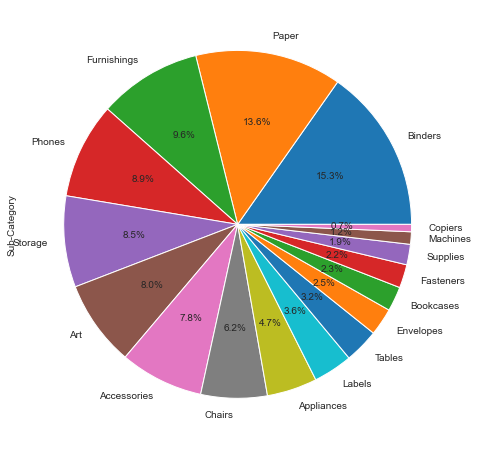

In [245]:
plt.figure(figsize=(12,8))
store_df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

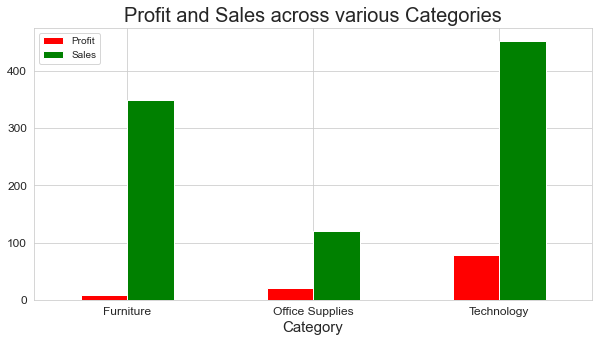

In [246]:
plt.rcParams['figure.figsize'] = [10, 5]
store_df.groupby('Category')['Profit','Sales'].mean().plot.bar(color=['red','green'])
plt.title("Profit and Sales across various Categories",fontsize=20)
plt.xlabel('Category',fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=0)
plt.show()

#### Inference : 
* Profit and Sales are highest in the Category 'Technology'
* Proft is least in 'Furniture'
* Sales is least in 'Office Supplies'

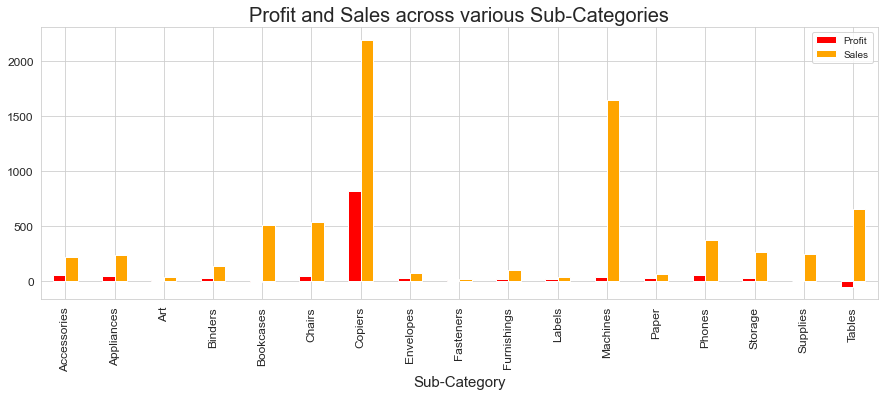

In [247]:
plt.rcParams['figure.figsize'] = [15, 5]
store_df.groupby('Sub-Category')['Profit','Sales'].mean().plot.bar(color=['red','orange'])
plt.title("Profit and Sales across various Sub-Categories",fontsize=20)
plt.xlabel('Sub-Category', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

#### Inference : 
* Profit and Sales are highest in the Sub-Category 'Copiers'
* Proft is least in 'Tables'
* Items like Tables, Copiers, Machines ,Chairs, Bookcases have high Sales. 

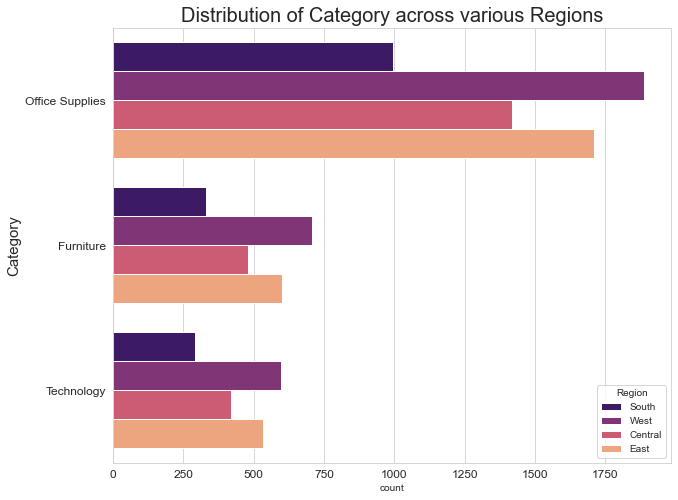

In [252]:
plt.rcParams['figure.figsize'] = [10, 8]
sns.countplot(y='Category',hue='Region',data=store_df,palette='magma',order=store_df['Category'].value_counts().index)
plt.title("Distribution of Category across various Regions",fontsize=20)
plt.ylabel('Category', fontsize=15)
plt.tick_params(labelsize=12)
# plt.xticks(rotation=45)
plt.show()

#### Inference : 
* Category Office Supplies in the 'West' region is the highest.
* Furniture and technology counts are least in the South region.
* Office Supplies are higher in all the regions as compared to other categories. 

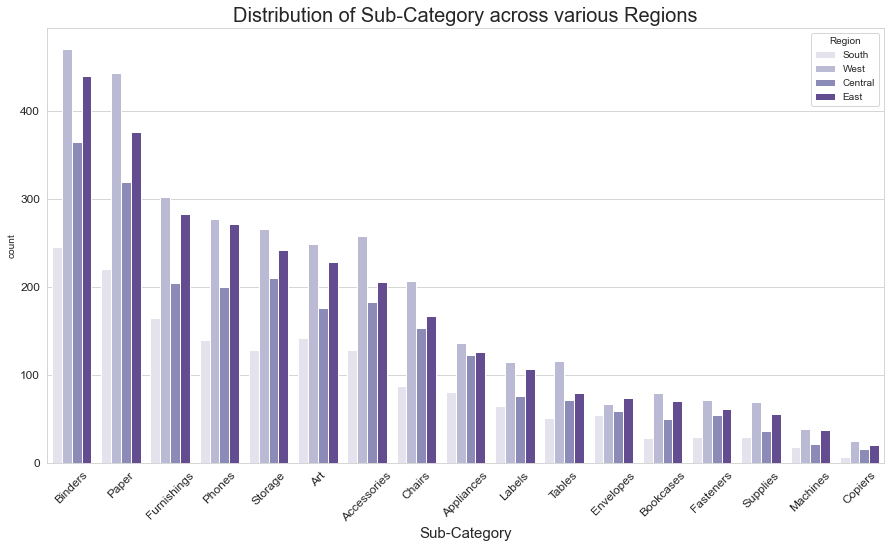

In [253]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot(x='Sub-Category',hue='Region',data=store_df,order=store_df['Sub-Category'].value_counts().index,palette='Purples')
plt.title("Distribution of Sub-Category across various Regions",fontsize=20)
plt.xlabel('Sub-Category', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

#### Inference : 
* Items from sub-Categories like Binders, Paper, Furnishings ,Phones, Accessories are higher in number than items in other categories .

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

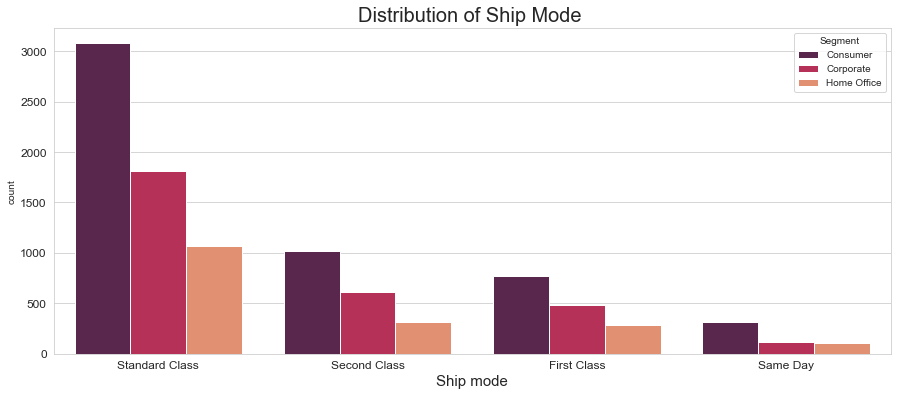

In [265]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.title("Distribution of Ship Mode " , fontsize=20)
sns.countplot(x="Ship Mode",data=store_df,hue='Segment',order=store_df['Ship Mode'].value_counts().index,palette='rocket')
plt.xlabel('Ship mode', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=0)

#### Inference : 
* The ship mode 'Standard Class'  has higher counts across all segments as compared to other shipping modes.
* The count of segment 'Consumer' is the highest across all segments and ship modes .
* Most people are from segment 'consumer' and they mostly prefer 'Standard Class'.

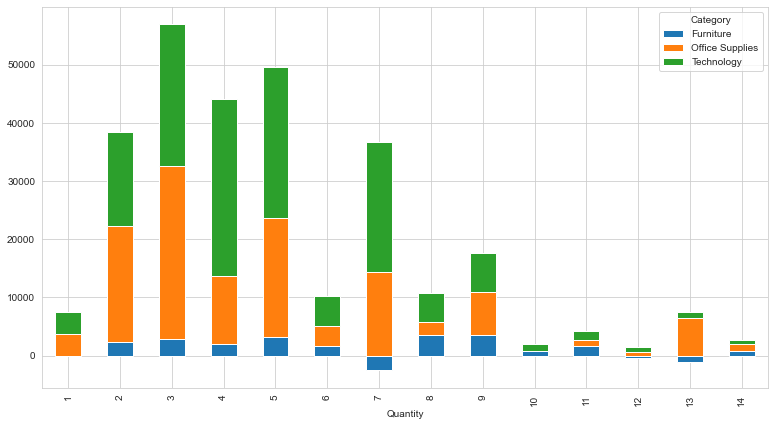

In [112]:
pd.crosstab(store_df['Quantity'],store_df['Category'],store_df['Profit'],aggfunc='sum').plot(kind='bar',stacked=True)

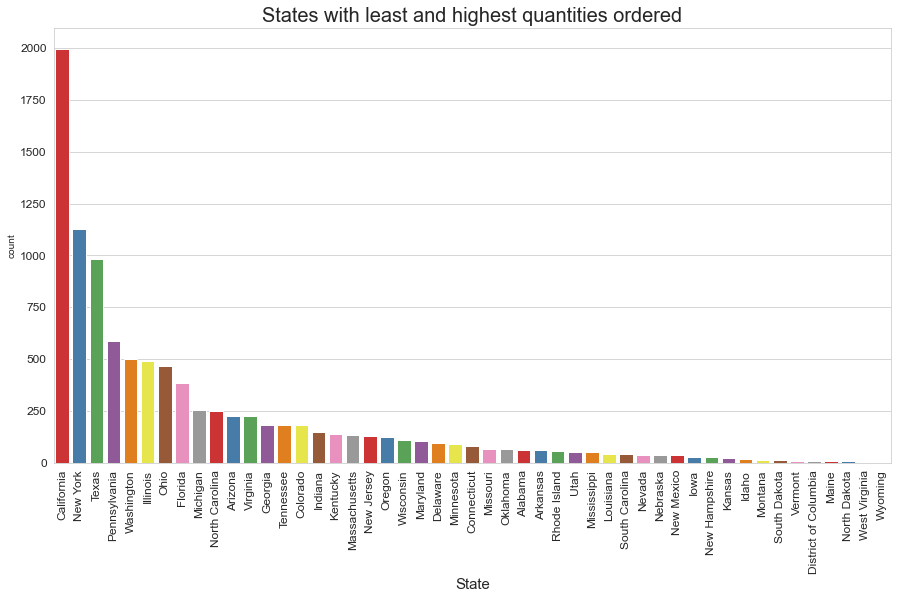

In [266]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot('State',data=store_df,order=store_df['State'].value_counts().index,palette='Set1')
plt.title("States with least and highest quantities ordered",fontsize=20)
plt.xlabel('State', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.show()

### Inference:
* California has the most quantities ordered followed by New York and Texas.

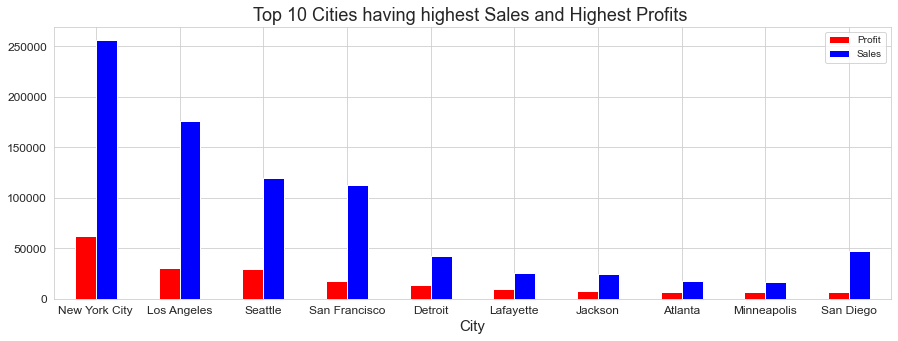

In [163]:
plt.rcParams['figure.figsize'] = [15, 5]
top_city=store_df.groupby('City')['Profit','Sales'].sum().sort_values(by=['Profit','Sales'],ascending=[False,False])
top_city=top_city.head(10)
top_city.plot.bar(color=['red','blue'])
plt.title("Top 10 Cities having highest Sales and Highest Profits ",fontsize=18)
plt.xlabel('City',fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=0)
plt.show()

### Inference:
* New York City has the most Sales and Profit followed by Los Angeles and Seattle.